In [27]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy import text
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [28]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
# Create our session (link) from Python to the DB
session = Session(engine)

In [30]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
inspector.get_table_names()


['measurement', 'station']

In [31]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [32]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [33]:
measurements = session.query(Measurement)
for measurement in measurements:
    print(measurement.date, measurement.prcp)

2010-01-01 0.08
2010-01-02 0.0
2010-01-03 0.0
2010-01-04 0.0
2010-01-06 None
2010-01-07 0.06
2010-01-08 0.0
2010-01-09 0.0
2010-01-10 0.0
2010-01-11 0.01
2010-01-12 0.0
2010-01-14 0.0
2010-01-15 0.0
2010-01-16 0.0
2010-01-17 0.0
2010-01-18 0.0
2010-01-19 0.0
2010-01-20 0.0
2010-01-21 0.0
2010-01-22 0.0
2010-01-23 0.0
2010-01-24 0.01
2010-01-25 0.0
2010-01-26 0.04
2010-01-27 0.12
2010-01-28 0.0
2010-01-30 None
2010-01-31 0.03
2010-02-01 0.01
2010-02-03 None
2010-02-04 0.01
2010-02-05 0.0
2010-02-06 0.0
2010-02-07 0.0
2010-02-08 0.0
2010-02-09 0.0
2010-02-11 0.0
2010-02-12 0.02
2010-02-13 0.01
2010-02-14 0.0
2010-02-15 0.0
2010-02-16 0.0
2010-02-17 0.0
2010-02-19 None
2010-02-20 0.03
2010-02-21 0.0
2010-02-22 0.0
2010-02-23 0.0
2010-02-24 0.0
2010-02-25 0.0
2010-02-26 0.0
2010-02-28 0.0
2010-03-01 0.01
2010-03-02 0.0
2010-03-03 0.0
2010-03-04 0.12
2010-03-05 0.08
2010-03-06 0.03
2010-03-07 0.0
2010-03-08 0.43
2010-03-09 0.06
2010-03-11 None
2010-03-12 0.0
2010-03-13 0.0
2010-03-14 0.0
20

2012-02-09 0.01
2012-02-10 0.0
2012-02-11 0.0
2012-02-12 0.0
2012-02-13 0.04
2012-02-14 0.01
2012-02-15 0.0
2012-02-16 0.0
2012-02-17 0.0
2012-02-18 0.04
2012-02-19 0.01
2012-02-20 0.0
2012-02-21 0.0
2012-02-22 0.0
2012-02-23 0.0
2012-02-24 0.0
2012-02-25 0.0
2012-02-26 0.05
2012-02-27 0.06
2012-02-28 0.0
2012-02-29 0.0
2012-03-01 0.06
2012-03-02 0.0
2012-03-03 0.03
2012-03-04 0.01
2012-03-05 1.08
2012-03-06 4.0
2012-03-07 2.42
2012-03-08 0.02
2012-03-09 0.19
2012-03-10 0.06
2012-03-11 0.0
2012-03-12 0.03
2012-03-13 0.0
2012-03-14 0.0
2012-03-15 0.0
2012-03-16 0.05
2012-03-17 0.0
2012-03-18 0.0
2012-03-19 0.0
2012-03-20 0.0
2012-03-21 0.0
2012-03-22 0.03
2012-03-23 0.01
2012-03-24 0.0
2012-03-25 0.0
2012-03-26 0.11
2012-03-27 0.03
2012-03-28 0.02
2012-03-29 0.0
2012-03-30 0.0
2012-03-31 0.0
2012-04-01 0.0
2012-04-02 0.0
2012-04-03 0.0
2012-04-04 0.0
2012-04-05 0.19
2012-04-06 0.0
2012-04-07 0.03
2012-04-08 0.0
2012-04-09 0.07
2012-04-10 0.05
2012-04-11 0.06
2012-04-12 0.0
2012-04-13 0.

2013-08-09 0.0
2013-08-10 0.03
2013-08-11 0.05
2013-08-12 0.0
2013-08-13 0.0
2013-08-14 0.02
2013-08-15 0.0
2013-08-16 0.01
2013-08-17 0.0
2013-08-18 0.0
2013-08-19 0.0
2013-08-20 0.0
2013-08-21 0.25
2013-08-22 0.0
2013-08-23 0.0
2013-08-24 0.0
2013-08-25 0.0
2013-08-26 0.0
2013-08-27 0.0
2013-08-28 0.0
2013-08-29 0.0
2013-08-30 0.0
2013-08-31 0.0
2013-09-01 0.02
2013-09-02 0.0
2013-09-03 0.0
2013-09-04 0.0
2013-09-05 0.0
2013-09-06 0.0
2013-09-07 0.14
2013-09-08 0.01
2013-09-09 0.0
2013-09-10 0.0
2013-09-11 0.0
2013-09-12 0.03
2013-09-13 0.02
2013-09-14 0.14
2013-09-15 0.01
2013-09-16 0.0
2013-09-17 0.02
2013-09-18 0.14
2013-09-19 0.02
2013-09-20 0.0
2013-09-21 0.02
2013-09-22 0.02
2013-09-23 0.01
2013-09-24 0.01
2013-09-25 0.25
2013-09-26 0.07
2013-09-27 0.0
2013-09-28 0.0
2013-09-29 0.08
2013-09-30 0.02
2013-10-01 0.0
2013-10-02 0.0
2013-10-03 0.0
2013-10-04 0.0
2013-10-05 0.0
2013-10-06 0.0
2013-10-07 0.0
2013-10-08 0.0
2013-10-09 0.0
2013-10-10 0.0
2013-10-11 0.0
2013-10-12 0.0
20

2015-05-15 0.13
2015-05-16 0.0
2015-05-17 0.0
2015-05-18 0.0
2015-05-19 0.0
2015-05-20 0.0
2015-05-21 0.0
2015-05-22 0.0
2015-05-23 0.07
2015-05-24 0.0
2015-05-25 0.0
2015-05-26 0.0
2015-05-27 0.0
2015-05-28 0.0
2015-05-29 0.0
2015-05-30 0.0
2015-05-31 0.0
2015-06-01 0.0
2015-06-02 0.0
2015-06-03 0.0
2015-06-04 0.0
2015-06-05 0.0
2015-06-06 0.0
2015-06-07 0.0
2015-06-08 0.0
2015-06-09 0.0
2015-06-10 0.0
2015-06-11 0.0
2015-06-12 0.0
2015-06-13 0.0
2015-06-14 0.0
2015-06-15 0.0
2015-06-16 0.0
2015-06-17 0.03
2015-06-18 0.0
2015-06-19 0.01
2015-06-20 0.04
2015-06-21 0.0
2015-06-22 0.0
2015-06-23 0.03
2015-06-24 0.03
2015-06-25 0.03
2015-06-26 0.0
2015-06-27 0.0
2015-06-28 0.0
2015-06-29 0.0
2015-06-30 0.0
2015-07-01 0.0
2015-07-02 0.0
2015-07-03 0.0
2015-07-04 0.0
2015-07-05 0.0
2015-07-06 0.0
2015-07-07 0.0
2015-07-08 0.03
2015-07-09 0.0
2015-07-10 0.01
2015-07-11 0.02
2015-07-12 0.02
2015-07-13 0.0
2015-07-14 0.01
2015-07-15 0.0
2015-07-16 0.0
2015-07-17 0.0
2015-07-18 0.0
2015-07-19 0

2010-08-26 0.05
2010-08-27 0.21
2010-08-28 0.0
2010-08-29 0.1
2010-08-30 0.02
2010-08-31 0.0
2010-09-01 0.0
2010-09-02 0.03
2010-09-03 0.29
2010-09-04 0.04
2010-09-05 0.08
2010-09-06 0.01
2010-09-07 0.03
2010-09-08 0.01
2010-09-09 0.01
2010-09-10 0.03
2010-09-11 0.02
2010-09-12 0.0
2010-09-13 0.0
2010-09-14 0.01
2010-09-15 0.0
2010-09-16 0.01
2010-09-17 0.0
2010-09-18 0.03
2010-09-19 0.08
2010-09-20 0.03
2010-09-21 0.02
2010-09-22 0.5
2010-09-23 0.33
2010-09-24 0.0
2010-09-25 0.0
2010-09-27 None
2010-09-28 0.0
2010-09-29 0.0
2010-09-30 0.02
2010-10-01 0.43
2010-10-02 0.16
2010-10-03 0.07
2010-10-04 0.06
2010-10-05 0.07
2010-10-06 0.0
2010-10-07 0.0
2010-10-08 0.0
2010-10-09 0.0
2010-10-10 0.03
2010-10-11 0.04
2010-10-12 0.06
2010-10-13 0.02
2010-10-14 0.0
2010-10-15 0.0
2010-10-16 0.0
2010-10-17 0.16
2010-10-18 0.02
2010-10-19 0.0
2010-10-20 0.0
2010-10-21 0.04
2010-10-22 0.0
2010-10-23 0.0
2010-10-24 0.0
2010-10-25 0.0
2010-10-26 0.16
2010-10-27 0.06
2010-10-28 0.09
2010-10-29 0.1
201

2012-04-28 0.0
2012-04-29 0.0
2012-04-30 0.0
2012-05-01 0.02
2012-05-02 0.13
2012-05-03 0.11
2012-05-04 0.06
2012-05-05 0.1
2012-05-06 0.0
2012-05-07 0.05
2012-05-08 0.0
2012-05-09 0.0
2012-05-10 0.0
2012-05-11 0.04
2012-05-12 0.0
2012-05-13 0.0
2012-05-14 0.0
2012-05-15 0.0
2012-05-16 0.0
2012-05-17 0.02
2012-05-18 0.0
2012-05-19 0.0
2012-05-20 0.03
2012-05-21 0.17
2012-05-22 0.0
2012-05-23 0.0
2012-05-24 0.07
2012-05-25 0.0
2012-05-26 0.04
2012-05-27 0.02
2012-05-28 0.01
2012-05-29 0.0
2012-05-30 0.0
2012-05-31 0.05
2012-06-01 0.08
2012-06-02 0.03
2012-06-03 0.0
2012-06-04 0.0
2012-06-05 0.0
2012-06-06 0.03
2012-06-07 0.0
2012-06-08 0.0
2012-06-09 0.0
2012-06-10 0.0
2012-06-11 0.04
2012-06-12 0.02
2012-06-13 0.05
2012-06-14 0.08
2012-06-15 0.0
2012-06-16 0.0
2012-06-17 0.02
2012-06-18 0.0
2012-06-19 0.01
2012-06-20 0.14
2012-06-21 0.02
2012-06-22 0.01
2012-06-23 0.28
2012-06-24 0.27
2012-06-25 0.04
2012-06-26 0.22
2012-06-27 0.23
2012-06-28 0.0
2012-06-29 0.06
2012-06-30 0.0
2012-07-

2013-12-09 0.0
2013-12-10 0.01
2013-12-11 0.13
2013-12-12 0.0
2013-12-13 0.01
2013-12-14 0.0
2013-12-15 0.0
2013-12-16 1.31
2013-12-17 0.01
2013-12-18 0.01
2013-12-19 1.0
2013-12-20 0.41
2013-12-21 0.01
2013-12-22 0.02
2013-12-23 0.02
2013-12-24 0.01
2013-12-25 0.02
2013-12-26 0.02
2013-12-27 0.0
2013-12-28 0.02
2013-12-29 0.03
2013-12-30 0.0
2013-12-31 0.09
2014-01-01 0.0
2014-01-02 0.0
2014-01-03 1.59
2014-01-04 0.01
2014-01-05 0.02
2014-01-06 0.19
2014-01-07 0.01
2014-01-08 0.0
2014-01-09 0.12
2014-01-10 0.0
2014-01-11 0.14
2014-01-12 0.0
2014-01-13 0.0
2014-01-14 0.89
2014-01-15 0.19
2014-01-16 0.04
2014-01-17 0.0
2014-01-18 0.03
2014-01-19 0.0
2014-01-20 0.02
2014-01-21 0.0
2014-01-22 0.65
2014-01-23 0.0
2014-01-24 0.0
2014-01-25 0.0
2014-01-26 0.0
2014-01-27 0.31
2014-01-28 0.43
2014-01-29 0.51
2014-01-30 0.2
2014-01-31 0.0
2014-02-01 0.12
2014-02-02 0.27
2014-02-03 0.0
2014-02-04 0.88
2014-02-05 0.39
2014-02-06 0.05
2014-02-07 0.06
2014-02-08 1.1
2014-02-09 0.36
2014-02-10 0.01


2015-08-03 0.02
2015-08-04 0.0
2015-08-05 0.02
2015-08-06 0.27
2015-08-07 0.3
2015-08-08 0.27
2015-08-10 0.01
2015-08-11 0.02
2015-08-12 0.09
2015-08-13 0.19
2015-08-14 0.21
2015-08-15 0.02
2015-08-17 0.51
2015-08-18 0.24
2015-08-19 0.02
2015-08-20 0.08
2015-08-21 0.05
2015-08-22 0.65
2015-08-23 0.33
2015-08-24 0.23
2015-08-25 0.52
2015-08-26 1.03
2015-08-27 0.0
2015-08-28 0.0
2015-08-29 0.25
2015-08-30 0.0
2015-09-01 0.32
2015-09-02 0.28
2015-09-03 1.55
2015-09-04 0.0
2015-09-05 0.0
2015-09-06 0.71
2015-09-07 0.19
2015-09-09 None
2015-09-10 0.06
2015-09-11 0.09
2015-09-12 2.7
2015-09-13 0.16
2015-09-14 0.63
2015-09-15 0.56
2015-09-16 0.06
2015-09-17 0.06
2015-09-18 0.08
2015-09-19 0.0
2015-09-20 0.07
2015-09-21 0.07
2015-09-22 0.32
2015-09-23 0.3
2015-09-24 0.01
2015-09-25 0.0
2015-09-26 0.36
2015-09-27 0.18
2015-09-28 0.17
2015-09-29 0.07
2015-09-30 0.17
2015-10-01 0.0
2015-10-02 0.02
2015-10-03 0.0
2015-10-04 0.0
2015-10-05 0.4
2015-10-06 0.22
2015-10-07 0.22
2015-10-08 0.05
2015-10

2017-05-08 0.22
2017-05-09 1.62
2017-05-10 0.05
2017-05-11 0.03
2017-05-12 0.04
2017-05-13 0.02
2017-05-14 0.05
2017-05-15 0.08
2017-05-16 0.03
2017-05-17 0.02
2017-05-18 0.09
2017-05-19 0.02
2017-05-20 0.0
2017-05-21 0.0
2017-05-22 0.0
2017-05-23 0.02
2017-05-24 0.58
2017-05-25 0.37
2017-05-26 0.02
2017-05-27 0.0
2017-05-28 0.29
2017-05-29 0.02
2017-05-30 0.2
2017-05-31 0.1
2017-06-01 0.03
2017-06-02 0.1
2017-06-03 0.2
2017-06-04 0.15
2017-06-05 0.0
2017-06-06 0.0
2017-06-07 0.0
2017-06-08 0.02
2017-06-09 0.02
2017-06-10 0.21
2017-06-11 0.24
2017-06-12 0.19
2017-06-13 0.36
2017-06-14 0.27
2017-06-15 0.17
2017-06-16 0.02
2017-06-17 0.35
2017-06-18 0.25
2017-06-19 0.05
2017-06-20 0.05
2017-06-21 0.02
2017-06-22 0.1
2017-06-23 0.0
2017-06-24 0.0
2017-06-25 0.08
2017-06-26 0.02
2017-06-27 0.0
2017-06-28 0.01
2017-06-29 0.03
2017-06-30 0.04
2017-07-01 0.06
2017-07-02 0.05
2017-07-03 0.13
2017-07-04 0.03
2017-07-05 0.0
2017-07-06 0.0
2017-07-07 0.02
2017-07-08 0.02
2017-07-09 0.09
2017-07-1

2013-09-26 0.19
2013-09-27 0.0
2013-09-28 0.0
2013-09-30 None
2013-10-01 0.05
2013-10-02 0.0
2013-10-03 0.0
2013-10-04 0.0
2013-10-06 None
2013-10-07 0.24
2013-10-08 0.01
2013-10-09 0.31
2013-10-10 0.0
2013-10-11 1.95
2013-10-14 None
2013-10-15 0.09
2013-10-16 0.02
2013-10-17 0.0
2013-10-18 0.01
2013-10-19 0.05
2013-10-20 0.0
2013-10-21 0.0
2013-10-22 0.0
2013-10-23 0.0
2013-10-24 0.0
2013-10-25 0.0
2013-10-26 0.0
2013-10-28 None
2013-10-29 0.0
2013-10-30 0.0
2013-10-31 0.1
2013-11-01 0.0
2013-11-04 None
2013-11-05 0.0
2013-11-06 0.14
2013-11-07 0.62
2013-11-08 1.55
2013-11-09 0.87
2013-11-10 2.77
2013-11-11 0.32
2013-11-12 0.03
2013-11-13 0.0
2013-11-14 0.0
2013-11-15 0.47
2013-11-16 0.0
2013-11-17 0.0
2013-11-18 0.04
2013-11-19 0.0
2013-11-20 0.0
2013-11-21 0.0
2013-11-22 0.0
2013-11-23 0.09
2013-11-25 None
2013-11-26 0.0
2013-11-27 0.0
2013-11-29 None
2013-11-30 0.26
2013-12-02 None
2013-12-03 0.2
2013-12-04 0.0
2013-12-05 0.0
2013-12-06 0.05
2013-12-07 0.04
2013-12-08 0.0
2013-12-0

2017-04-20 0.0
2017-04-21 1.05
2017-04-22 0.7
2017-04-24 None
2017-04-25 0.0
2017-04-26 0.14
2017-04-27 0.02
2017-04-28 0.09
2017-04-29 0.95
2017-04-30 1.17
2017-05-01 0.03
2017-05-02 0.01
2017-05-03 0.01
2017-05-04 0.08
2017-05-05 0.28
2017-05-06 0.06
2017-05-08 0.95
2017-05-09 0.52
2017-05-10 0.0
2017-05-12 None
2017-05-15 None
2017-05-16 0.05
2017-05-17 0.0
2017-05-18 0.16
2017-05-19 0.01
2017-05-20 0.01
2017-05-22 None
2017-05-23 0.11
2017-05-24 0.1
2017-05-25 0.07
2017-05-26 0.0
2017-05-27 0.0
2017-05-28 0.02
2017-05-29 0.0
2017-05-30 0.04
2017-05-31 0.0
2017-06-01 0.0
2017-06-02 0.15
2017-06-03 0.16
2017-06-04 0.05
2017-06-05 0.02
2017-06-06 0.0
2017-06-07 0.0
2017-06-08 0.01
2017-06-09 0.0
2017-06-10 0.53
2017-06-11 0.14
2017-06-12 0.35
2017-06-13 0.1
2017-06-14 0.21
2017-06-15 0.3
2017-06-16 0.02
2017-06-17 0.02
2017-06-18 0.18
2017-06-19 0.19
2017-06-20 0.17
2017-06-23 None
2017-06-26 None
2017-06-29 None
2017-06-30 0.0
2017-07-03 None
2017-07-05 None
2017-07-07 None
2017-07-0

2013-06-10 0.0
2013-06-12 None
2013-06-13 None
2013-06-14 None
2013-06-17 None
2013-06-18 0.08
2013-06-19 0.0
2013-06-20 0.04
2013-06-21 0.08
2013-06-25 None
2013-06-26 None
2013-06-27 0.01
2013-06-28 None
2013-07-01 0.03
2013-07-02 0.04
2013-07-03 0.08
2013-07-05 None
2013-07-08 None
2013-07-09 None
2013-07-10 None
2013-07-11 None
2013-07-12 0.04
2013-07-16 0.0
2013-07-17 0.02
2013-07-18 None
2013-07-23 0.26
2013-07-24 0.02
2013-07-25 0.01
2013-07-30 None
2013-07-31 None
2013-08-01 0.5
2013-08-02 0.02
2013-08-05 None
2013-08-06 None
2013-08-07 None
2013-08-08 0.0
2013-08-09 0.0
2013-08-12 None
2013-08-13 0.0
2013-08-14 0.04
2013-08-15 0.0
2013-08-19 None
2013-08-20 None
2013-08-21 None
2013-08-22 None
2013-08-26 None
2013-08-27 0.0
2013-08-28 0.0
2013-08-29 0.05
2013-09-03 None
2013-09-04 0.0
2013-09-05 0.0
2013-09-06 0.0
2013-09-09 None
2013-09-10 0.0
2013-09-11 0.0
2013-09-12 0.0
2013-09-13 0.3
2013-09-16 None
2013-09-17 None
2013-09-18 None
2013-09-19 None
2013-09-20 0.0
2013-09-26

2016-06-09 None
2016-06-13 None
2016-06-14 None
2016-06-15 0.02
2016-06-16 0.1
2016-06-17 0.38
2016-06-20 0.1
2016-06-21 None
2016-06-22 None
2016-06-23 None
2016-06-24 None
2016-06-27 None
2016-06-28 None
2016-06-29 None
2016-06-30 None
2016-07-01 None
2016-07-05 None
2016-07-06 None
2016-07-07 None
2016-07-08 None
2016-07-11 None
2016-07-12 None
2016-07-13 None
2016-07-14 None
2016-07-15 None
2016-07-18 None
2016-07-19 0.5
2016-07-20 None
2016-07-21 None
2016-07-25 None
2016-07-26 0.01
2016-07-27 None
2016-08-02 0.0
2016-08-03 0.02
2016-08-04 0.13
2016-08-05 0.03
2016-08-08 None
2016-08-09 None
2016-08-10 None
2016-08-11 None
2016-08-12 None
2016-08-15 None
2016-08-16 0.0
2016-08-17 0.0
2016-08-18 0.0
2016-08-22 None
2016-08-23 None
2016-08-24 None
2016-08-25 0.0
2016-08-26 0.04
2016-08-29 None
2016-08-30 0.02
2016-08-31 None
2016-09-01 None
2016-09-02 None
2016-09-08 None
2016-09-09 None
2016-09-12 None
2016-09-13 None
2016-09-14 None
2016-09-15 None
2016-09-16 0.0
2016-09-19 None
2

2010-11-16 0.0
2010-11-17 0.0
2010-11-18 0.0
2010-11-19 0.13
2010-11-20 0.0
2010-11-21 0.05
2010-11-22 0.0
2010-11-23 0.0
2010-11-24 0.0
2010-11-25 0.02
2010-11-26 0.0
2010-11-27 0.01
2010-11-28 0.64
2010-11-29 0.03
2010-11-30 0.0
2010-12-01 0.03
2010-12-02 0.02
2010-12-03 0.01
2010-12-04 0.0
2010-12-05 0.0
2010-12-06 0.0
2010-12-07 0.0
2010-12-08 0.15
2010-12-09 0.03
2010-12-10 2.02
2010-12-11 0.3
2010-12-12 0.09
2010-12-13 0.02
2010-12-14 0.04
2010-12-15 0.0
2010-12-16 0.0
2010-12-17 0.0
2010-12-18 0.0
2010-12-19 2.86
2010-12-20 4.95
2010-12-21 0.63
2010-12-22 0.58
2010-12-23 0.11
2010-12-24 0.02
2010-12-25 0.02
2010-12-26 0.74
2010-12-27 0.09
2010-12-28 0.07
2010-12-29 0.04
2010-12-30 0.27
2010-12-31 0.01
2011-01-01 0.03
2011-01-02 0.0
2011-01-03 0.0
2011-01-04 0.0
2011-01-05 0.0
2011-01-06 0.15
2011-01-07 0.02
2011-01-08 0.0
2011-01-09 0.0
2011-01-10 0.0
2011-01-11 0.43
2011-01-12 1.34
2011-01-13 3.62
2011-01-14 0.1
2011-01-15 0.0
2011-01-16 0.0
2011-01-17 0.19
2011-01-18 0.0
2011-

2012-09-05 0.0
2012-09-06 0.07
2012-09-07 0.02
2012-09-08 0.14
2012-09-09 0.02
2012-09-10 0.0
2012-09-11 0.0
2012-09-12 0.05
2012-09-13 0.0
2012-09-14 0.19
2012-09-15 0.0
2012-09-16 0.0
2012-09-17 0.0
2012-09-18 0.13
2012-09-19 0.27
2012-09-20 0.21
2012-09-21 0.05
2012-09-22 0.0
2012-09-23 0.09
2012-09-24 0.1
2012-09-25 0.03
2012-09-26 0.01
2012-09-27 0.0
2012-09-28 0.0
2012-09-29 0.0
2012-09-30 0.04
2012-10-01 0.01
2012-10-02 0.0
2012-10-03 0.0
2012-10-04 0.0
2012-10-05 0.0
2012-10-06 0.0
2012-10-07 0.0
2012-10-08 0.0
2012-10-09 0.0
2012-10-10 0.0
2012-10-11 0.03
2012-10-12 0.0
2012-10-13 0.0
2012-10-14 0.0
2012-10-15 0.2
2012-10-16 0.0
2012-10-17 0.0
2012-10-18 0.14
2012-10-19 0.03
2012-10-20 0.0
2012-10-21 0.0
2012-10-22 0.0
2012-10-23 0.0
2012-10-24 0.0
2012-10-25 0.82
2012-10-26 0.0
2012-10-27 0.0
2012-10-28 0.05
2012-10-29 0.11
2012-10-30 0.12
2012-11-01 None
2012-11-02 0.0
2012-11-03 0.0
2012-11-04 0.0
2012-11-05 0.0
2012-11-06 0.0
2012-11-07 0.1
2012-11-08 0.0
2012-11-09 0.0
20

2015-10-09 0.01
2015-10-11 None
2015-10-12 0.56
2015-10-13 2.24
2015-10-14 1.42
2015-10-15 0.75
2015-10-16 0.11
2015-10-17 0.15
2015-10-18 0.05
2015-10-20 None
2015-10-21 0.25
2015-10-22 0.07
2015-10-23 0.0
2015-10-24 0.0
2015-10-25 0.0
2015-10-26 0.01
2015-10-27 0.33
2015-10-28 0.0
2015-10-29 0.64
2015-10-30 0.11
2015-10-31 0.04
2015-11-01 0.17
2015-11-02 0.0
2015-11-03 0.0
2015-11-04 0.13
2015-11-05 0.15
2015-11-06 0.0
2015-11-07 0.21
2015-11-08 0.05
2015-11-09 0.07
2015-11-11 None
2015-11-12 0.03
2015-11-13 0.1
2015-11-14 0.12
2015-11-15 0.0
2015-11-16 0.0
2015-11-17 0.0
2015-11-18 0.23
2015-11-19 0.07
2015-11-20 1.75
2015-11-21 2.3
2015-11-22 1.84
2015-11-23 1.1
2015-11-24 1.12
2015-11-25 0.13
2015-11-26 0.58
2015-11-27 0.49
2015-11-28 0.02
2015-11-29 0.14
2015-11-30 0.01
2015-12-02 None
2015-12-03 0.03
2015-12-04 0.0
2015-12-05 0.0
2015-12-07 None
2015-12-08 0.04
2015-12-09 0.13
2015-12-10 0.14
2015-12-11 0.06
2015-12-12 0.41
2015-12-13 0.01
2015-12-14 0.03
2015-12-15 0.28
2015-12

2011-07-16 0.05
2011-07-17 0.17
2011-07-18 0.04
2011-07-19 0.0
2011-07-20 0.06
2011-07-21 0.28
2011-07-22 0.12
2011-07-23 0.01
2011-07-24 0.02
2011-07-25 0.24
2011-07-26 0.02
2011-07-27 0.25
2011-07-28 0.09
2011-07-29 0.07
2011-07-30 0.85
2011-07-31 0.0
2011-08-01 0.0
2011-08-02 0.08
2011-08-03 0.05
2011-08-04 0.12
2011-08-05 0.07
2011-08-06 0.02
2011-08-07 0.08
2011-08-08 0.0
2011-08-09 0.42
2011-08-10 0.01
2011-08-11 0.0
2011-08-12 0.02
2011-08-13 0.11
2011-08-14 0.08
2011-08-15 0.01
2011-08-16 0.05
2011-08-17 0.05
2011-08-18 0.0
2011-08-19 0.04
2011-08-20 0.07
2011-08-21 0.25
2011-08-22 0.18
2011-08-23 0.17
2011-08-24 0.03
2011-08-25 0.01
2011-08-26 0.04
2011-08-27 0.03
2011-08-28 0.41
2011-08-29 0.07
2011-08-30 0.17
2011-08-31 0.07
2011-09-01 0.09
2011-09-02 0.14
2011-09-03 0.0
2011-09-04 0.0
2011-09-05 0.03
2011-09-06 0.03
2011-09-07 0.0
2011-09-08 0.08
2011-09-09 0.0
2011-09-10 0.36
2011-09-11 0.18
2011-09-12 0.0
2011-09-13 0.01
2011-09-14 0.11
2011-09-15 0.09
2011-09-16 1.25
201

2014-02-02 0.26
2014-02-03 0.01
2014-02-04 0.67
2014-02-05 0.41
2014-02-06 0.15
2014-02-07 0.03
2014-02-08 0.64
2014-02-09 1.14
2014-02-10 0.05
2014-02-11 0.0
2014-02-12 0.01
2014-02-13 0.0
2014-02-14 0.1
2014-02-15 0.43
2014-02-16 0.63
2014-02-17 0.31
2014-02-18 0.11
2014-02-19 0.0
2014-02-20 0.01
2014-02-21 0.0
2014-02-22 0.53
2014-02-23 0.06
2014-02-24 0.01
2014-02-25 0.01
2014-02-26 0.01
2014-02-27 0.03
2014-02-28 0.02
2014-03-01 0.35
2014-03-02 0.28
2014-03-03 0.28
2014-03-04 0.0
2014-03-05 0.0
2014-03-06 0.0
2014-03-07 0.19
2014-03-08 0.54
2014-03-09 1.72
2014-03-10 0.32
2014-03-11 0.28
2014-03-12 0.0
2014-03-13 0.0
2014-03-14 0.07
2014-03-15 0.62
2014-03-16 0.14
2014-03-17 0.06
2014-03-18 0.03
2014-03-19 0.0
2014-03-20 0.0
2014-03-21 0.0
2014-03-22 0.03
2014-03-23 0.0
2014-03-24 0.0
2014-03-25 0.0
2014-03-26 0.75
2014-03-27 0.27
2014-03-28 3.86
2014-03-29 0.26
2014-03-30 1.23
2014-03-31 0.03
2014-04-01 0.03
2014-04-02 0.66
2014-04-03 0.1
2014-04-04 0.0
2014-04-05 0.0
2014-04-06 

2016-08-23 1.79
2016-08-24 2.15
2016-08-25 0.06
2016-08-26 0.01
2016-08-27 0.12
2016-08-28 0.6
2016-08-29 0.35
2016-08-30 0.0
2016-08-31 0.24
2016-09-01 0.02
2016-09-02 0.01
2016-09-03 0.12
2016-09-04 0.14
2016-09-05 0.03
2016-09-06 0.11
2016-09-07 0.16
2016-09-08 0.07
2016-09-09 0.16
2016-09-10 0.09
2016-09-11 0.3
2016-09-12 0.31
2016-09-13 0.34
2016-09-14 2.33
2016-09-15 0.83
2016-09-16 0.06
2016-09-17 0.36
2016-09-18 0.07
2016-09-19 0.01
2016-09-20 0.22
2016-09-21 0.07
2016-09-22 0.34
2016-09-23 0.94
2016-09-24 0.01
2016-09-25 0.03
2016-09-26 0.17
2016-09-27 0.17
2016-09-28 0.0
2016-09-29 0.59
2016-09-30 0.25
2016-10-01 0.14
2016-10-02 0.06
2016-10-03 0.16
2016-10-04 0.03
2016-10-05 0.01
2016-10-06 0.0
2016-10-07 0.0
2016-10-08 0.0
2016-10-09 0.0
2016-10-10 0.0
2016-10-11 0.28
2016-10-12 0.03
2016-10-13 0.0
2016-10-14 0.0
2016-10-15 0.04
2016-10-16 0.0
2016-10-17 0.01
2016-10-18 0.02
2016-10-19 0.11
2016-10-20 0.0
2016-10-21 0.0
2016-10-22 0.15
2016-10-23 0.02
2016-10-24 0.08
2016-1

2011-12-10 0.03
2011-12-11 0.29
2011-12-12 0.03
2011-12-13 0.1
2011-12-14 0.06
2011-12-15 0.01
2011-12-16 0.01
2011-12-17 0.0
2011-12-18 0.0
2011-12-19 0.0
2011-12-20 0.0
2011-12-21 0.03
2011-12-22 0.02
2011-12-23 0.01
2011-12-24 0.01
2011-12-25 0.0
2011-12-26 0.0
2011-12-27 0.0
2011-12-28 0.0
2011-12-29 0.0
2011-12-30 0.0
2011-12-31 0.01
2012-01-01 0.0
2012-01-03 0.0
2012-01-04 0.0
2012-01-05 0.0
2012-01-06 0.0
2012-01-07 0.0
2012-01-08 0.0
2012-01-09 0.0
2012-01-10 0.0
2012-01-11 0.0
2012-01-12 0.0
2012-01-13 0.0
2012-01-14 0.0
2012-01-15 0.0
2012-01-16 0.02
2012-01-17 0.0
2012-01-18 0.0
2012-01-19 0.0
2012-01-20 0.0
2012-01-21 0.0
2012-01-22 0.0
2012-01-23 0.01
2012-01-24 0.0
2012-01-25 0.0
2012-01-26 0.0
2012-01-27 0.33
2012-01-28 0.0
2012-01-29 0.01
2012-01-30 0.01
2012-01-31 0.0
2012-02-01 0.0
2012-02-02 0.0
2012-02-03 0.0
2012-02-04 0.0
2012-02-05 0.0
2012-02-06 0.15
2012-02-07 0.3
2012-02-08 0.39
2012-02-09 0.0
2012-02-10 0.0
2012-02-11 0.0
2012-02-12 0.0
2012-02-13 0.0
2012-02

2014-09-19 0.54
2014-09-20 0.0
2014-09-21 0.0
2014-09-22 0.0
2014-09-23 0.0
2014-09-24 0.0
2014-09-25 0.05
2014-09-26 0.07
2014-09-27 0.09
2014-09-28 0.02
2014-09-29 0.02
2014-09-30 0.0
2014-10-01 0.03
2014-10-02 0.0
2014-10-03 0.0
2014-10-04 0.0
2014-10-05 0.0
2014-10-06 0.38
2014-10-07 0.24
2014-10-08 0.0
2014-10-09 0.0
2014-10-10 0.0
2014-10-11 0.0
2014-10-12 0.0
2014-10-13 0.0
2014-10-14 0.0
2014-10-15 0.03
2014-10-16 0.0
2014-10-17 0.0
2014-10-18 0.07
2014-10-19 4.0
2014-10-20 1.7
2014-10-21 0.0
2014-10-22 0.0
2014-10-23 0.08
2014-10-24 0.0
2014-10-25 0.0
2014-10-26 0.01
2014-10-27 0.0
2014-10-28 0.0
2014-10-29 0.0
2014-10-30 0.0
2014-10-31 0.0
2014-11-02 0.01
2014-11-03 0.03
2014-11-04 0.0
2014-11-05 0.0
2014-11-06 0.04
2014-11-07 0.03
2014-11-08 0.04
2014-11-09 0.0
2014-11-10 0.0
2014-11-11 0.0
2014-11-12 0.0
2014-11-13 0.0
2014-11-14 0.0
2014-11-15 0.41
2014-11-16 0.1
2014-11-17 0.0
2014-11-18 0.0
2014-11-20 0.01
2014-11-21 0.0
2014-11-22 0.0
2014-11-23 0.0
2014-11-24 0.0
2014-

2012-06-18 0.0
2012-06-19 0.38
2012-06-20 1.84
2012-06-21 0.34
2012-06-23 0.94
2012-06-24 1.13
2012-06-25 0.89
2012-06-26 0.92
2012-06-27 0.73
2012-06-28 0.37
2012-06-29 0.79
2012-07-01 None
2012-07-02 0.05
2012-07-03 1.04
2012-07-04 0.85
2012-07-05 0.98
2012-07-06 1.08
2012-07-07 0.86
2012-07-08 0.05
2012-07-09 0.01
2012-07-10 0.12
2012-07-11 0.39
2012-07-12 0.0
2012-07-13 0.52
2012-07-14 0.29
2012-07-15 0.06
2012-07-16 0.83
2012-07-17 0.71
2012-07-18 1.0
2012-07-19 0.34
2012-07-20 0.13
2012-07-21 0.03
2012-07-22 0.04
2012-07-23 0.29
2012-07-24 0.0
2012-07-25 0.18
2012-07-26 0.0
2012-07-27 0.23
2012-07-28 0.5
2012-07-29 2.87
2012-07-30 0.36
2012-07-31 0.59
2012-08-01 0.05
2012-08-02 0.0
2012-08-03 0.09
2012-08-04 0.06
2012-08-05 0.44
2012-08-06 0.3
2012-08-07 0.22
2012-08-08 0.44
2012-08-09 0.14
2012-08-10 0.02
2012-08-11 0.26
2012-08-12 0.23
2012-08-13 0.03
2012-08-14 0.26
2012-08-15 0.02
2012-08-16 0.0
2012-08-17 0.24
2012-08-19 None
2012-08-20 0.38
2012-08-21 0.41
2012-08-22 0.24
2

2014-05-23 0.0
2014-05-24 0.05
2014-05-25 0.51
2014-05-26 2.2
2014-05-27 0.11
2014-05-28 0.41
2014-05-29 0.19
2014-05-30 0.41
2014-06-01 0.26
2014-06-02 0.68
2014-06-03 0.19
2014-06-04 0.09
2014-06-05 0.03
2014-06-06 0.88
2014-06-07 0.15
2014-06-08 0.29
2014-06-09 1.0
2014-06-10 0.11
2014-06-11 0.57
2014-06-12 0.02
2014-06-13 0.01
2014-06-14 0.0
2014-06-15 0.03
2014-06-16 0.38
2014-06-17 1.45
2014-06-18 0.32
2014-06-19 0.2
2014-06-20 0.75
2014-06-21 0.09
2014-06-22 0.03
2014-06-23 0.74
2014-06-24 0.07
2014-06-25 0.97
2014-06-26 0.42
2014-06-27 0.9
2014-06-28 1.29
2014-06-29 1.29
2014-07-01 None
2014-07-02 0.42
2014-07-03 1.1
2014-07-04 0.07
2014-07-05 0.12
2014-07-06 1.34
2014-07-07 0.57
2014-07-08 0.42
2014-07-09 0.55
2014-07-10 0.33
2014-07-11 0.16
2014-07-12 0.16
2014-07-13 1.23
2014-07-14 1.01
2014-07-15 1.18
2014-07-17 None
2014-07-18 1.04
2014-07-19 0.01
2014-07-20 4.3
2014-07-21 0.72
2014-07-22 0.14
2014-07-23 0.93
2014-07-24 0.13
2014-07-25 0.05
2014-07-26 0.26
2014-07-27 1.43


2016-01-05 0.0
2016-01-06 1.49
2016-01-07 1.32
2016-01-08 0.0
2016-01-09 0.0
2016-01-10 0.0
2016-01-11 0.0
2016-01-12 0.0
2016-01-13 0.0
2016-01-14 0.0
2016-01-15 0.0
2016-01-17 None
2016-01-18 0.0
2016-01-19 0.0
2016-01-20 0.01
2016-01-21 0.1
2016-01-22 0.0
2016-01-23 0.0
2016-01-24 0.0
2016-01-25 0.07
2016-01-26 0.38
2016-01-27 0.0
2016-01-28 0.0
2016-01-30 None
2016-01-31 0.08
2016-02-01 0.15
2016-02-02 0.33
2016-02-03 0.26
2016-02-04 0.0
2016-02-05 0.08
2016-02-06 0.0
2016-02-07 0.11
2016-02-08 0.0
2016-02-09 0.0
2016-02-10 0.0
2016-02-11 0.0
2016-02-12 0.19
2016-02-13 0.22
2016-02-14 0.11
2016-02-15 0.05
2016-02-16 0.01
2016-02-18 None
2016-02-19 0.58
2016-02-20 0.1
2016-02-21 0.0
2016-02-23 None
2016-02-24 0.0
2016-02-25 0.0
2016-02-26 0.04
2016-02-27 0.0
2016-02-28 0.0
2016-02-29 0.0
2016-03-01 0.02
2016-03-02 0.0
2016-03-03 0.0
2016-03-06 None
2016-03-07 0.0
2016-03-08 0.0
2016-03-09 0.19
2016-03-10 0.0
2016-03-11 0.16
2016-03-12 0.0
2016-03-13 0.1
2016-03-14 0.16
2016-03-15 0.

In [35]:
# Precipitation Analysis: Design a query to retrieve the last 12 months of precipitation data.
measurements_dt_prcp_last_year = session.query(Measurement)
for measurement in measurements:
    print(measurement.date, measurement.prcp)

2010-01-01 0.08
2010-01-02 0.0
2010-01-03 0.0
2010-01-04 0.0
2010-01-06 None
2010-01-07 0.06
2010-01-08 0.0
2010-01-09 0.0
2010-01-10 0.0
2010-01-11 0.01
2010-01-12 0.0
2010-01-14 0.0
2010-01-15 0.0
2010-01-16 0.0
2010-01-17 0.0
2010-01-18 0.0
2010-01-19 0.0
2010-01-20 0.0
2010-01-21 0.0
2010-01-22 0.0
2010-01-23 0.0
2010-01-24 0.01
2010-01-25 0.0
2010-01-26 0.04
2010-01-27 0.12
2010-01-28 0.0
2010-01-30 None
2010-01-31 0.03
2010-02-01 0.01
2010-02-03 None
2010-02-04 0.01
2010-02-05 0.0
2010-02-06 0.0
2010-02-07 0.0
2010-02-08 0.0
2010-02-09 0.0
2010-02-11 0.0
2010-02-12 0.02
2010-02-13 0.01
2010-02-14 0.0
2010-02-15 0.0
2010-02-16 0.0
2010-02-17 0.0
2010-02-19 None
2010-02-20 0.03
2010-02-21 0.0
2010-02-22 0.0
2010-02-23 0.0
2010-02-24 0.0
2010-02-25 0.0
2010-02-26 0.0
2010-02-28 0.0
2010-03-01 0.01
2010-03-02 0.0
2010-03-03 0.0
2010-03-04 0.12
2010-03-05 0.08
2010-03-06 0.03
2010-03-07 0.0
2010-03-08 0.43
2010-03-09 0.06
2010-03-11 None
2010-03-12 0.0
2010-03-13 0.0
2010-03-14 0.0
20

2011-12-07 0.0
2011-12-08 0.0
2011-12-09 0.13
2011-12-10 0.07
2011-12-11 0.07
2011-12-12 0.08
2011-12-13 0.4
2011-12-14 0.7
2011-12-15 0.0
2011-12-16 0.01
2011-12-17 0.07
2011-12-18 0.02
2011-12-19 0.15
2011-12-20 0.02
2011-12-21 0.18
2011-12-22 0.03
2011-12-23 0.04
2011-12-24 0.1
2011-12-25 0.03
2011-12-26 0.0
2011-12-27 0.0
2011-12-28 0.0
2011-12-29 0.0
2011-12-30 0.0
2011-12-31 0.01
2012-01-01 0.0
2012-01-02 0.0
2012-01-03 0.0
2012-01-04 0.0
2012-01-06 0.0
2012-01-07 0.0
2012-01-08 0.0
2012-01-10 0.0
2012-01-11 0.0
2012-01-12 0.0
2012-01-14 0.0
2012-01-15 0.0
2012-01-16 0.04
2012-01-17 0.0
2012-01-18 0.0
2012-01-19 0.02
2012-01-20 0.0
2012-01-21 0.0
2012-01-22 0.0
2012-01-23 0.0
2012-01-24 0.0
2012-01-25 0.0
2012-01-26 0.0
2012-01-27 0.04
2012-01-28 0.03
2012-01-29 1.03
2012-01-30 0.01
2012-01-31 0.0
2012-02-01 0.0
2012-02-02 0.0
2012-02-03 0.0
2012-02-04 0.0
2012-02-05 0.0
2012-02-06 0.0
2012-02-07 0.37
2012-02-08 0.28
2012-02-09 0.01
2012-02-10 0.0
2012-02-11 0.0
2012-02-12 0.0
20

2014-10-31 0.02
2014-11-01 0.04
2014-11-02 0.0
2014-11-03 0.0
2014-11-04 0.0
2014-11-05 0.14
2014-11-06 0.1
2014-11-07 0.0
2014-11-08 0.09
2014-11-09 0.0
2014-11-10 0.0
2014-11-11 0.0
2014-11-12 0.05
2014-11-13 0.0
2014-11-14 0.0
2014-11-15 0.62
2014-11-16 0.01
2014-11-17 0.0
2014-11-18 0.0
2014-11-19 0.0
2014-11-20 0.08
2014-11-21 0.0
2014-11-22 0.0
2014-11-23 0.0
2014-11-24 0.04
2014-11-25 0.0
2014-11-26 0.0
2014-11-27 0.0
2014-11-28 0.0
2014-11-29 0.0
2014-11-30 0.01
2014-12-01 0.0
2014-12-02 0.02
2014-12-03 0.15
2014-12-04 0.09
2014-12-05 0.0
2014-12-06 0.0
2014-12-07 0.0
2014-12-08 0.0
2014-12-09 0.0
2014-12-10 0.0
2014-12-11 0.05
2014-12-12 0.01
2014-12-13 0.0
2014-12-14 0.03
2014-12-15 0.02
2014-12-16 0.01
2014-12-17 0.01
2014-12-18 0.0
2014-12-19 0.0
2014-12-20 0.0
2014-12-21 0.0
2014-12-22 0.0
2014-12-23 0.93
2014-12-24 0.04
2014-12-25 0.02
2014-12-26 0.0
2014-12-27 0.0
2014-12-28 0.0
2014-12-29 0.0
2014-12-30 0.0
2014-12-31 0.05
2015-01-01 0.0
2015-01-02 0.04
2015-01-03 0.86


2010-03-06 0.09
2010-03-07 0.0
2010-03-08 0.34
2010-03-09 0.05
2010-03-10 0.04
2010-03-11 0.09
2010-03-12 0.03
2010-03-13 0.0
2010-03-14 0.0
2010-03-15 0.16
2010-03-16 0.16
2010-03-17 0.4
2010-03-18 0.44
2010-03-19 0.08
2010-03-20 0.01
2010-03-21 0.0
2010-03-22 0.0
2010-03-23 0.0
2010-03-24 0.03
2010-03-25 0.01
2010-03-26 0.02
2010-03-27 0.01
2010-03-28 0.01
2010-03-29 0.0
2010-03-30 0.02
2010-03-31 0.02
2010-04-01 0.01
2010-04-02 0.02
2010-04-03 0.03
2010-04-04 0.13
2010-04-05 0.19
2010-04-06 0.07
2010-04-07 0.51
2010-04-08 0.0
2010-04-09 0.24
2010-04-10 0.03
2010-04-11 0.03
2010-04-12 0.01
2010-04-13 0.06
2010-04-14 0.07
2010-04-15 0.0
2010-04-16 0.03
2010-04-17 0.02
2010-04-18 0.0
2010-04-19 0.01
2010-04-20 0.06
2010-04-21 0.0
2010-04-22 0.0
2010-04-23 0.13
2010-04-24 0.15
2010-04-25 0.0
2010-04-26 0.0
2010-04-27 0.01
2010-04-28 0.07
2010-04-29 0.01
2010-04-30 0.02
2010-05-01 0.02
2010-05-02 0.03
2010-05-03 0.89
2010-05-04 0.07
2010-05-05 0.0
2010-05-06 0.0
2010-05-07 0.08
2010-05-0

2013-03-16 0.0
2013-03-17 0.0
2013-03-18 0.49
2013-03-19 0.0
2013-03-20 0.0
2013-03-21 0.0
2013-03-22 0.0
2013-03-23 0.11
2013-03-24 0.43
2013-03-25 0.8
2013-03-26 0.03
2013-03-27 0.0
2013-03-28 0.07
2013-03-29 0.07
2013-03-30 0.05
2013-03-31 0.02
2013-04-01 0.0
2013-04-02 0.0
2013-04-03 0.02
2013-04-04 0.07
2013-04-05 0.0
2013-04-06 0.0
2013-04-07 0.01
2013-04-08 0.0
2013-04-09 0.02
2013-04-10 0.03
2013-04-11 0.01
2013-04-12 0.0
2013-04-13 0.01
2013-04-14 0.0
2013-04-15 0.43
2013-04-16 0.19
2013-04-17 0.0
2013-04-18 0.0
2013-04-19 0.03
2013-04-20 0.11
2013-04-21 0.0
2013-04-22 0.44
2013-04-23 0.37
2013-04-24 0.76
2013-04-25 0.94
2013-04-26 0.0
2013-04-27 0.0
2013-04-28 0.0
2013-04-29 0.0
2013-04-30 0.0
2013-05-01 0.04
2013-05-02 0.0
2013-05-03 0.0
2013-05-04 0.0
2013-05-05 1.05
2013-05-06 0.09
2013-05-07 0.0
2013-05-08 0.0
2013-05-09 0.0
2013-05-10 0.1
2013-05-11 0.09
2013-05-12 0.22
2013-05-13 0.95
2013-05-14 0.01
2013-05-15 0.0
2013-05-16 0.0
2013-05-17 0.0
2013-05-18 0.0
2013-05-19

2015-10-11 0.09
2015-10-12 1.0
2015-10-13 1.7
2015-10-14 1.21
2015-10-15 0.81
2015-10-16 0.73
2015-10-17 0.1
2015-10-18 0.03
2015-10-19 0.18
2015-10-20 0.2
2015-10-21 0.02
2015-10-22 0.0
2015-10-23 0.03
2015-10-24 0.0
2015-10-25 0.03
2015-10-26 0.04
2015-10-27 0.06
2015-10-28 0.27
2015-10-29 0.02
2015-10-30 0.02
2015-10-31 0.22
2015-11-01 0.33
2015-11-02 0.0
2015-11-03 0.0
2015-11-04 0.03
2015-11-05 0.12
2015-11-06 0.12
2015-11-07 0.12
2015-11-08 0.3
2015-11-09 0.11
2015-11-10 0.06
2015-11-11 0.0
2015-11-12 0.3
2015-11-13 0.1
2015-11-14 0.53
2015-11-15 0.08
2015-11-16 0.0
2015-11-17 0.1
2015-11-18 0.1
2015-11-19 0.18
2015-11-20 0.68
2015-11-21 1.61
2015-11-22 0.8
2015-11-23 0.48
2015-11-24 1.7
2015-11-25 0.11
2015-11-26 0.36
2015-11-27 0.91
2015-11-28 0.07
2015-11-29 0.02
2015-11-30 0.03
2015-12-02 0.03
2015-12-03 0.08
2015-12-04 0.01
2015-12-05 0.28
2015-12-06 0.52
2015-12-07 0.0
2015-12-08 0.08
2015-12-09 0.1
2015-12-10 0.08
2015-12-11 0.0
2015-12-12 0.62
2015-12-13 0.0
2015-12-14 0.

2011-07-09 0.07
2011-07-10 0.02
2011-07-12 None
2011-07-13 0.03
2011-07-14 0.01
2011-07-15 0.13
2011-07-16 0.02
2011-07-18 None
2011-07-19 0.01
2011-07-20 0.1
2011-07-21 0.0
2011-07-22 0.07
2011-07-25 None
2011-07-26 0.01
2011-07-27 0.13
2011-07-28 0.0
2011-07-29 0.04
2011-07-30 0.39
2011-08-01 0.0
2011-08-02 0.03
2011-08-03 0.02
2011-08-04 0.01
2011-08-05 0.02
2011-08-07 0.0
2011-08-13 None
2011-08-15 None
2011-08-16 0.01
2011-08-17 0.0
2011-08-18 0.0
2011-08-25 None
2011-08-26 0.06
2011-08-27 0.12
2011-08-29 None
2011-08-30 0.11
2011-08-31 0.12
2011-09-01 0.03
2011-09-02 0.08
2011-09-03 0.07
2011-09-04 0.03
2011-09-06 None
2011-09-07 0.0
2011-09-09 None
2011-09-10 0.23
2011-09-12 None
2011-09-13 0.05
2011-09-14 0.0
2011-09-15 0.02
2011-09-16 0.02
2011-09-17 0.04
2011-09-19 None
2011-09-20 0.0
2011-09-21 0.06
2011-09-22 0.0
2011-09-23 0.03
2011-09-26 0.0
2011-09-27 0.0
2011-09-28 0.02
2011-09-29 0.0
2011-09-30 0.02
2011-10-01 0.19
2011-10-02 0.0
2011-10-03 0.0
2011-10-04 0.08
2011-10-

2013-07-17 0.0
2013-07-18 0.0
2013-07-19 0.05
2013-07-20 0.08
2013-07-22 None
2013-07-23 0.14
2013-07-24 0.0
2013-07-25 0.0
2013-07-26 0.0
2013-07-27 0.0
2013-07-29 None
2013-07-30 0.11
2013-07-31 0.05
2013-08-19 None
2013-08-20 0.0
2013-08-21 0.43
2013-08-22 0.0
2013-08-23 0.0
2013-08-25 None
2013-08-26 0.0
2013-08-27 0.0
2013-08-28 0.0
2013-08-29 0.01
2013-08-30 0.04
2013-08-31 0.0
2013-09-02 None
2013-09-03 0.0
2013-09-04 0.01
2013-09-05 0.0
2013-09-06 0.0
2013-09-07 0.36
2013-09-09 None
2013-09-10 0.0
2013-09-11 0.08
2013-09-12 0.0
2013-09-13 0.85
2013-09-14 0.02
2013-09-16 None
2013-09-17 0.21
2013-09-18 0.03
2013-09-19 0.0
2013-09-20 0.0
2013-09-22 None
2013-09-23 0.04
2013-09-24 0.17
2013-09-25 0.12
2013-09-26 0.19
2013-09-27 0.0
2013-09-28 0.0
2013-09-30 None
2013-10-01 0.05
2013-10-02 0.0
2013-10-03 0.0
2013-10-04 0.0
2013-10-06 None
2013-10-07 0.24
2013-10-08 0.01
2013-10-09 0.31
2013-10-10 0.0
2013-10-11 1.95
2013-10-14 None
2013-10-15 0.09
2013-10-16 0.02
2013-10-17 0.0
201

2017-01-26 0.01
2017-01-27 0.0
2017-01-28 0.0
2017-01-30 None
2017-01-31 0.0
2017-02-01 0.0
2017-02-02 0.0
2017-02-03 0.0
2017-02-05 None
2017-02-06 0.04
2017-02-07 0.9
2017-02-08 0.0
2017-02-09 0.0
2017-02-10 0.0
2017-02-11 2.39
2017-02-12 1.91
2017-02-13 0.0
2017-02-14 0.0
2017-02-15 0.0
2017-02-16 0.62
2017-02-17 0.06
2017-02-20 None
2017-02-21 0.0
2017-02-22 0.11
2017-02-23 0.0
2017-02-24 0.0
2017-02-26 None
2017-02-27 0.0
2017-02-28 0.04
2017-03-01 1.12
2017-03-03 None
2017-03-06 None
2017-03-07 0.0
2017-03-08 0.0
2017-03-09 0.5
2017-03-10 0.13
2017-03-12 None
2017-03-13 0.0
2017-03-14 0.0
2017-03-16 None
2017-03-17 0.06
2017-03-18 0.0
2017-03-20 None
2017-03-21 0.0
2017-03-22 0.0
2017-03-23 0.0
2017-03-24 0.15
2017-03-27 None
2017-03-28 0.0
2017-03-29 0.03
2017-03-30 0.03
2017-03-31 0.0
2017-04-01 0.0
2017-04-02 0.0
2017-04-03 0.09
2017-04-04 0.0
2017-04-05 0.07
2017-04-06 0.0
2017-04-07 0.0
2017-04-09 None
2017-04-10 0.0
2017-04-11 0.16
2017-04-12 0.29
2017-04-13 0.0
2017-04-14 

2014-09-09 0.0
2014-09-10 0.0
2014-09-11 0.0
2014-09-12 0.0
2014-09-15 None
2014-09-16 None
2014-09-17 None
2014-09-18 0.0
2014-09-19 0.12
2014-09-22 0.0
2014-09-23 0.02
2014-09-24 None
2014-09-25 None
2014-09-26 None
2014-09-29 None
2014-09-30 0.0
2014-10-01 0.0
2014-10-02 0.05
2014-10-03 0.0
2014-10-04 None
2014-10-05 None
2014-10-10 None
2014-10-13 None
2014-10-14 None
2014-10-15 None
2014-10-16 None
2014-10-17 0.0
2014-10-20 None
2014-10-21 0.03
2014-10-22 0.03
2014-10-23 None
2014-10-24 None
2014-10-27 None
2014-11-12 None
2014-11-13 None
2014-11-14 None
2014-11-17 None
2014-11-18 0.0
2014-11-19 0.0
2014-11-20 None
2014-11-21 None
2014-12-01 0.28
2014-12-02 0.0
2014-12-03 0.05
2014-12-04 0.15
2014-12-05 None
2014-12-08 None
2014-12-09 None
2014-12-10 0.0
2014-12-11 0.06
2014-12-15 0.1
2014-12-16 None
2014-12-17 None
2014-12-18 None
2014-12-19 None
2014-12-22 0.04
2014-12-23 0.1
2014-12-24 0.02
2014-12-26 0.0
2014-12-29 None
2014-12-30 0.0
2015-01-02 None
2015-01-05 None
2015-01-06

2017-06-21 None
2017-06-22 0.0
2017-06-23 0.0
2017-06-26 None
2017-06-27 0.0
2017-06-28 0.0
2017-06-29 0.0
2017-06-30 0.12
2017-07-03 None
2017-07-05 None
2017-07-06 None
2017-07-07 None
2017-07-10 None
2017-07-11 None
2017-07-12 None
2017-07-13 None
2017-07-18 0.0
2017-07-19 0.0
2017-07-20 0.0
2017-07-21 0.0
2017-07-25 0.0
2017-07-26 None
2017-07-27 None
2017-07-28 0.01
2017-07-31 None
2010-01-01 0.21
2010-01-02 0.02
2010-01-03 0.0
2010-01-04 0.01
2010-01-05 0.02
2010-01-07 None
2010-01-08 0.03
2010-01-09 0.01
2010-01-10 0.01
2010-01-11 0.14
2010-01-12 0.02
2010-01-13 0.02
2010-01-14 0.0
2010-01-18 None
2010-01-19 0.0
2010-01-20 0.0
2010-01-25 None
2010-01-26 0.13
2010-01-27 0.21
2010-01-28 0.01
2010-02-02 None
2010-02-03 0.87
2010-02-04 0.01
2010-02-05 0.01
2010-02-06 0.02
2010-02-07 0.01
2010-02-09 0.0
2010-02-10 0.0
2010-02-12 None
2010-02-13 0.06
2010-02-14 0.01
2010-02-15 0.0
2010-02-16 0.0
2010-02-17 0.01
2010-02-19 None
2010-02-20 0.1
2010-02-21 0.01
2010-02-23 None
2010-02-24 

2011-02-01 0.0
2011-02-02 0.0
2011-02-03 0.0
2011-02-04 0.0
2011-02-05 0.0
2011-02-06 0.0
2011-02-07 0.95
2011-02-08 0.18
2011-02-09 0.0
2011-02-10 0.04
2011-02-11 0.29
2011-02-12 1.82
2011-02-13 0.71
2011-02-15 0.0
2011-02-16 0.0
2011-02-17 0.0
2011-02-18 0.01
2011-02-19 0.0
2011-02-20 0.3
2011-02-21 0.02
2011-02-22 0.01
2011-02-23 0.01
2011-02-24 1.44
2011-02-25 0.0
2011-02-26 0.05
2011-02-27 0.0
2011-02-28 0.02
2011-03-01 0.18
2011-03-02 0.01
2011-03-03 0.06
2011-03-04 1.7
2011-03-05 0.22
2011-03-06 0.27
2011-03-07 0.03
2011-03-08 0.01
2011-03-09 0.9
2011-03-10 0.27
2011-03-11 0.2
2011-03-12 0.01
2011-03-13 0.0
2011-03-14 0.0
2011-03-15 0.0
2011-03-16 0.0
2011-03-17 0.07
2011-03-18 0.05
2011-03-19 0.08
2011-03-20 0.23
2011-03-21 0.0
2011-03-22 0.17
2011-03-23 0.0
2011-03-24 0.19
2011-03-25 0.02
2011-03-26 0.0
2011-03-27 0.0
2011-03-29 0.0
2011-03-30 0.0
2011-03-31 0.0
2011-04-01 0.07
2011-04-02 0.0
2011-04-03 0.0
2011-04-04 0.0
2011-04-05 0.0
2011-04-06 0.11
2011-04-07 0.5
2011-04-0

2012-12-08 0.0
2012-12-09 0.0
2012-12-10 0.0
2012-12-11 0.0
2012-12-12 0.04
2012-12-13 0.13
2012-12-14 0.09
2012-12-15 0.12
2012-12-16 0.04
2012-12-17 0.09
2012-12-18 0.22
2012-12-19 0.04
2012-12-20 0.1
2012-12-21 0.02
2012-12-22 0.0
2012-12-23 0.0
2012-12-24 0.0
2012-12-25 0.1
2012-12-26 0.03
2012-12-27 0.0
2012-12-28 0.0
2012-12-29 0.0
2012-12-30 0.03
2012-12-31 0.0
2013-01-01 0.38
2013-01-02 0.13
2013-01-03 0.43
2013-01-04 0.05
2013-01-05 0.23
2013-01-06 0.11
2013-01-07 0.02
2013-01-08 0.06
2013-01-09 0.17
2013-01-10 0.01
2013-01-11 0.0
2013-01-12 0.08
2013-01-13 0.06
2013-01-14 0.0
2013-01-15 1.07
2013-01-16 0.0
2013-01-17 0.0
2013-01-18 0.01
2013-01-19 0.05
2013-01-20 0.0
2013-01-21 0.0
2013-01-22 0.0
2013-01-24 None
2013-01-25 0.43
2013-01-26 0.01
2013-01-27 0.02
2013-01-28 2.48
2013-01-29 0.61
2013-01-30 0.03
2013-01-31 0.02
2013-02-01 0.01
2013-02-02 0.0
2013-02-03 0.0
2013-02-04 0.01
2013-02-05 0.01
2013-02-06 0.0
2013-02-07 0.09
2013-02-08 0.0
2013-02-09 0.06
2013-02-10 0.0
2

2014-08-04 0.0
2014-08-05 0.0
2014-08-06 0.36
2014-08-08 None
2014-08-09 0.12
2014-08-11 None
2014-08-12 0.0
2014-08-13 0.27
2014-08-14 0.0
2014-08-15 0.0
2014-08-16 0.15
2014-08-17 0.05
2014-08-18 0.01
2014-08-19 0.0
2014-08-20 0.0
2014-08-21 0.17
2014-08-22 0.02
2014-08-24 None
2014-08-25 0.0
2014-08-26 0.19
2014-08-27 0.02
2014-08-28 0.03
2014-08-29 0.0
2014-08-30 0.17
2014-08-31 0.0
2014-09-01 0.0
2014-09-02 0.39
2014-09-03 0.0
2014-09-04 0.04
2014-09-05 0.09
2014-09-06 0.22
2014-09-07 0.0
2014-09-08 0.0
2014-09-09 0.0
2014-09-10 0.0
2014-09-11 0.0
2014-09-12 0.0
2014-09-13 0.0
2014-09-14 0.0
2014-09-15 0.3
2014-09-16 0.0
2014-09-17 0.19
2014-09-18 0.39
2014-09-21 None
2014-09-24 None
2014-09-25 0.08
2014-09-26 0.17
2014-09-27 0.08
2014-09-28 0.0
2014-09-29 0.36
2014-09-30 0.04
2014-10-01 0.87
2014-10-02 0.02
2014-10-03 0.0
2014-10-04 0.0
2014-10-05 0.26
2014-10-06 0.2
2014-10-07 0.0
2014-10-08 0.04
2014-10-10 None
2014-10-11 0.0
2014-10-12 0.0
2014-10-13 0.0
2014-10-14 0.0
2014-10

2016-03-31 0.01
2016-04-01 0.0
2016-04-02 0.0
2016-04-03 0.0
2016-04-04 0.0
2016-04-06 None
2016-04-07 0.0
2016-04-08 0.0
2016-04-09 0.0
2016-04-10 0.0
2016-04-11 0.0
2016-04-12 0.0
2016-04-13 0.18
2016-04-14 0.08
2016-04-15 0.04
2016-04-16 0.0
2016-04-17 0.09
2016-04-18 0.46
2016-04-20 None
2016-04-21 0.0
2016-04-22 0.0
2016-04-23 0.04
2016-04-24 0.29
2016-04-25 0.0
2016-04-26 0.0
2016-04-27 0.0
2016-04-28 0.0
2016-04-29 0.0
2016-04-30 0.0
2016-05-01 0.09
2016-05-02 0.07
2016-05-03 0.0
2016-05-04 0.0
2016-05-05 0.27
2016-05-06 0.0
2016-05-07 1.8
2016-05-08 0.75
2016-05-09 0.02
2016-05-10 0.0
2016-05-11 0.0
2016-05-12 0.0
2016-05-13 0.0
2016-05-14 0.06
2016-05-15 0.0
2016-05-16 0.0
2016-05-17 0.0
2016-05-18 0.0
2016-05-19 0.0
2016-05-20 0.0
2016-05-21 0.0
2016-05-22 0.0
2016-05-23 0.0
2016-05-24 0.0
2016-05-25 0.0
2016-05-26 0.01
2016-05-27 0.0
2016-05-28 0.36
2016-05-29 0.0
2016-05-30 0.05
2016-05-31 1.18
2016-06-01 0.38
2016-06-02 0.03
2016-06-03 0.47
2016-06-04 0.02
2016-06-05 0.14


2011-02-01 0.0
2011-02-02 0.0
2011-02-03 0.0
2011-02-04 0.0
2011-02-05 0.0
2011-02-06 0.0
2011-02-07 1.33
2011-02-08 1.43
2011-02-09 0.0
2011-02-10 0.0
2011-02-11 0.98
2011-02-12 0.98
2011-02-13 1.47
2011-02-14 0.0
2011-02-15 0.0
2011-02-16 0.84
2011-02-17 0.07
2011-02-18 0.53
2011-02-19 0.0
2011-02-20 2.69
2011-02-21 0.01
2011-02-22 0.03
2011-02-23 0.0
2011-02-24 1.06
2011-02-25 0.03
2011-02-26 0.0
2011-02-27 0.01
2011-02-28 0.0
2011-03-01 0.03
2011-03-02 0.0
2011-03-03 0.69
2011-03-04 1.25
2011-03-05 0.26
2011-03-06 1.51
2011-03-07 0.01
2011-03-08 0.39
2011-03-09 0.01
2011-03-10 2.39
2011-03-11 0.34
2011-03-12 0.01
2011-03-13 0.01
2011-03-14 0.0
2011-03-15 0.0
2011-03-16 0.0
2011-03-17 0.04
2011-03-18 0.09
2011-03-19 0.17
2011-03-20 0.17
2011-03-21 0.0
2011-03-22 0.1
2011-03-23 0.17
2011-03-24 0.21
2011-03-25 0.02
2011-03-26 0.02
2011-03-27 0.1
2011-03-28 0.0
2011-03-29 0.09
2011-03-30 0.04
2011-03-31 0.0
2011-04-01 0.4
2011-04-02 0.09
2011-04-03 0.01
2011-04-04 0.01
2011-04-05 0.01


2013-10-20 0.04
2013-10-21 0.01
2013-10-22 0.01
2013-10-23 0.05
2013-10-24 0.12
2013-10-25 0.16
2013-10-26 0.32
2013-10-27 0.01
2013-10-28 0.18
2013-10-29 0.04
2013-10-30 0.0
2013-10-31 0.23
2013-11-01 0.02
2013-11-02 0.27
2013-11-03 0.0
2013-11-04 0.12
2013-11-05 0.24
2013-11-06 0.8
2013-11-07 0.12
2013-11-08 1.42
2013-11-09 2.21
2013-11-10 5.54
2013-11-11 0.3
2013-11-12 0.23
2013-11-13 0.02
2013-11-14 0.02
2013-11-15 0.47
2013-11-16 0.03
2013-11-17 0.01
2013-11-18 0.04
2013-11-19 0.01
2013-11-20 0.0
2013-11-21 0.0
2013-11-22 0.01
2013-11-23 0.11
2013-11-24 0.0
2013-11-25 0.0
2013-11-26 0.0
2013-11-27 0.0
2013-11-28 0.03
2013-11-29 0.84
2013-11-30 0.88
2013-12-01 0.12
2013-12-02 1.71
2013-12-03 0.57
2013-12-04 0.01
2013-12-05 0.0
2013-12-06 0.0
2013-12-07 0.01
2013-12-08 0.0
2013-12-09 0.0
2013-12-10 0.04
2013-12-11 0.17
2013-12-12 0.03
2013-12-13 0.04
2013-12-14 0.08
2013-12-15 0.06
2013-12-16 1.97
2013-12-17 0.02
2013-12-18 0.02
2013-12-19 0.77
2013-12-20 1.14
2013-12-21 0.07
2013-1

2015-09-13 0.26
2015-09-14 0.52
2015-09-15 1.61
2015-09-16 0.41
2015-09-17 0.07
2015-09-18 0.42
2015-09-19 0.07
2015-09-20 0.25
2015-09-21 0.63
2015-09-22 0.37
2015-09-23 0.48
2015-09-24 0.11
2015-09-25 0.2
2015-09-26 0.49
2015-09-27 0.45
2015-09-28 0.77
2015-09-29 0.8
2015-09-30 0.14
2015-10-01 0.0
2015-10-02 0.06
2015-10-03 0.0
2015-10-04 0.09
2015-10-05 1.46
2015-10-06 0.19
2015-10-07 0.01
2015-10-08 0.09
2015-10-09 0.04
2015-10-11 0.8
2015-10-12 0.41
2015-10-13 1.53
2015-10-14 0.39
2015-10-15 1.02
2015-10-16 1.33
2015-10-17 0.51
2015-10-18 0.07
2015-10-19 0.0
2015-10-20 0.14
2015-10-21 0.33
2015-10-22 0.08
2015-10-23 0.0
2015-10-24 0.01
2015-10-25 0.0
2015-10-26 0.01
2015-10-27 0.16
2015-10-28 0.0
2015-10-29 0.07
2015-10-30 0.0
2015-10-31 0.38
2015-11-01 0.78
2015-11-02 0.02
2015-11-03 0.0
2015-11-04 0.04
2015-11-05 0.18
2015-11-06 0.29
2015-11-07 0.46
2015-11-08 0.36
2015-11-09 0.3
2015-11-10 0.47
2015-11-11 0.08
2015-11-12 0.34
2015-11-13 0.17
2015-11-14 0.23
2015-11-15 0.0
2015-

2010-01-18 0.0
2010-01-19 0.0
2010-01-20 0.0
2010-01-21 0.0
2010-01-22 0.0
2010-01-23 0.0
2010-01-24 0.0
2010-01-25 0.0
2010-01-26 0.03
2010-01-27 0.25
2010-01-29 0.0
2010-01-30 0.4
2010-01-31 0.01
2010-02-01 0.0
2010-02-02 0.0
2010-02-03 0.55
2010-02-04 0.0
2010-02-05 0.0
2010-02-06 0.0
2010-02-08 0.0
2010-02-09 0.0
2010-02-10 0.0
2010-02-11 0.0
2010-02-12 0.0
2010-02-13 0.03
2010-02-14 0.0
2010-02-15 0.0
2010-02-16 0.0
2010-02-17 0.0
2010-02-18 0.0
2010-02-19 0.0
2010-02-20 0.0
2010-02-21 0.0
2010-02-22 0.0
2010-02-23 0.0
2010-02-24 0.0
2010-02-25 0.0
2010-02-26 0.0
2010-02-28 None
2010-03-01 0.0
2010-03-02 0.0
2010-03-03 0.0
2010-03-04 0.04
2010-03-05 0.03
2010-03-06 0.0
2010-03-07 0.0
2010-03-08 0.08
2010-03-09 0.06
2010-03-10 0.01
2010-03-11 0.0
2010-03-12 0.0
2010-03-14 0.0
2010-03-15 0.01
2010-03-16 0.06
2010-03-17 0.0
2010-03-18 0.01
2010-03-19 0.0
2010-03-20 0.0
2010-03-21 0.0
2010-03-22 0.0
2010-03-23 0.01
2010-03-24 0.0
2010-03-25 0.0
2010-03-26 0.0
2010-03-27 0.0
2010-03-28

2012-11-03 0.0
2012-11-04 0.0
2012-11-05 0.0
2012-11-06 0.0
2012-11-07 0.0
2012-11-08 0.0
2012-11-09 0.0
2012-11-10 0.0
2012-11-11 0.0
2012-11-12 0.0
2012-11-13 0.02
2012-11-14 0.0
2012-11-15 0.05
2012-11-16 0.01
2012-11-17 0.0
2012-11-18 0.15
2012-11-19 0.0
2012-11-20 0.0
2012-11-21 0.0
2012-11-22 0.0
2012-11-23 0.07
2012-11-24 0.25
2012-11-26 0.03
2012-11-27 0.03
2012-11-28 0.0
2012-11-29 0.0
2012-11-30 0.0
2012-12-02 0.0
2012-12-03 0.0
2012-12-04 0.0
2012-12-05 0.08
2012-12-06 0.01
2012-12-07 0.0
2012-12-08 0.0
2012-12-09 0.0
2012-12-10 0.0
2012-12-11 0.0
2012-12-12 0.0
2012-12-13 0.0
2012-12-14 0.15
2012-12-15 0.0
2012-12-16 0.0
2012-12-17 0.0
2012-12-18 0.02
2012-12-19 0.0
2012-12-20 0.0
2012-12-21 0.0
2012-12-22 0.01
2012-12-23 0.0
2012-12-24 0.0
2012-12-25 0.0
2012-12-26 0.0
2012-12-27 0.0
2012-12-28 0.0
2012-12-29 0.0
2012-12-30 0.0
2012-12-31 0.0
2013-01-01 0.0
2013-01-02 0.01
2013-01-03 0.13
2013-01-04 0.01
2013-01-05 0.0
2013-01-06 0.0
2013-01-07 0.01
2013-01-08 0.0
2013-01-

2015-03-14 0.0
2015-03-15 0.0
2015-03-17 None
2015-03-18 0.0
2015-03-20 None
2015-04-02 None
2015-04-03 0.0
2015-04-06 None
2015-04-07 0.0
2015-04-08 0.0
2015-04-09 0.0
2015-04-10 0.0
2015-04-13 None
2015-04-14 0.1
2015-04-15 0.0
2015-04-16 0.0
2015-04-17 0.0
2015-04-20 None
2015-04-21 0.0
2015-04-22 0.05
2015-04-23 0.0
2015-04-24 0.0
2015-04-27 None
2015-04-29 None
2015-04-30 0.0
2015-05-01 0.0
2015-05-04 None
2015-05-05 0.0
2015-05-06 0.0
2015-05-07 0.0
2015-05-08 0.09
2015-05-11 None
2015-05-12 0.0
2015-05-13 0.0
2015-05-14 0.0
2015-05-15 0.0
2015-05-18 None
2015-05-19 0.0
2015-05-20 0.0
2015-05-21 0.0
2015-05-22 0.0
2015-05-26 None
2015-05-27 0.0
2015-05-28 0.0
2015-05-29 0.0
2015-06-01 0.01
2015-06-02 0.0
2015-06-03 0.0
2015-06-04 0.0
2015-06-05 0.0
2015-06-08 None
2015-06-09 0.0
2015-06-11 None
2015-06-12 0.0
2015-06-15 None
2015-06-16 0.2
2015-06-17 0.0
2015-06-18 0.0
2015-06-19 0.0
2015-06-22 None
2015-06-23 0.0
2015-06-24 0.0
2015-06-25 0.01
2015-06-26 0.01
2015-07-01 None
201

2011-04-01 1.16
2011-04-02 1.15
2011-04-03 0.59
2011-04-04 0.05
2011-04-05 0.42
2011-04-06 0.18
2011-04-07 3.35
2011-04-08 0.34
2011-04-09 0.03
2011-04-10 0.09
2011-04-11 0.35
2011-04-12 0.25
2011-04-13 0.0
2011-04-14 0.08
2011-04-15 0.01
2011-04-16 0.38
2011-04-17 0.0
2011-04-18 0.28
2011-04-19 0.0
2011-04-21 0.0
2011-04-22 0.0
2011-04-23 0.0
2011-04-24 0.04
2011-04-25 0.23
2011-04-26 0.46
2011-04-27 0.09
2011-04-28 0.34
2011-04-29 0.9
2011-05-01 1.21
2011-05-02 0.35
2011-05-03 3.05
2011-05-05 0.34
2011-05-06 2.07
2011-05-07 1.91
2011-05-08 2.26
2011-05-09 0.31
2011-05-10 0.04
2011-05-11 0.74
2011-05-12 0.1
2011-05-13 0.29
2011-05-14 0.06
2011-05-15 0.0
2011-05-16 0.01
2011-05-17 0.03
2011-05-18 0.19
2011-05-19 0.15
2011-05-20 0.0
2011-05-21 0.01
2011-05-22 0.71
2011-05-23 0.17
2011-05-24 0.02
2011-05-25 0.09
2011-05-26 0.0
2011-05-27 0.09
2011-05-28 0.01
2011-05-29 0.17
2011-05-30 0.16
2011-05-31 0.15
2011-06-01 0.61
2011-06-02 0.22
2011-06-03 2.0
2011-06-04 2.45
2011-06-05 0.76
2011

2012-10-30 0.2
2012-10-31 0.2
2012-11-01 0.0
2012-11-02 0.0
2012-11-03 0.0
2012-11-04 0.0
2012-11-05 0.02
2012-11-06 0.64
2012-11-07 0.09
2012-11-08 0.51
2012-11-09 0.27
2012-11-10 0.15
2012-11-11 0.02
2012-11-12 0.28
2012-11-13 0.42
2012-11-14 0.2
2012-11-15 0.64
2012-11-16 0.74
2012-11-17 0.18
2012-11-19 None
2012-11-20 0.36
2012-11-21 0.11
2012-11-22 0.0
2012-11-23 0.0
2012-11-24 0.0
2012-11-25 0.0
2012-11-26 0.53
2012-11-27 0.01
2012-11-28 0.01
2012-11-29 0.0
2012-11-30 0.0
2012-12-01 0.0
2012-12-02 0.01
2012-12-03 0.0
2012-12-04 0.0
2012-12-05 0.04
2012-12-06 0.0
2012-12-07 0.0
2012-12-08 0.01
2012-12-09 0.04
2012-12-10 0.12
2012-12-11 0.0
2012-12-12 0.24
2012-12-13 0.44
2012-12-14 0.72
2012-12-15 0.44
2012-12-16 0.48
2012-12-17 0.54
2012-12-18 2.25
2012-12-19 0.34
2012-12-20 1.8
2012-12-21 0.67
2012-12-22 0.12
2012-12-23 0.0
2012-12-24 0.0
2012-12-25 0.0
2012-12-26 0.21
2012-12-27 0.02
2012-12-28 0.0
2012-12-29 0.0
2012-12-30 0.1
2012-12-31 0.04
2013-01-01 0.24
2013-01-02 2.13
20

2015-06-18 0.54
2015-06-19 0.69
2015-06-20 0.13
2015-06-21 0.1
2015-06-22 0.19
2015-06-23 0.31
2015-06-24 0.78
2015-06-25 1.36
2015-06-26 0.4
2015-06-27 0.17
2015-06-28 0.16
2015-06-29 1.62
2015-06-30 0.0
2015-07-01 0.0
2015-07-02 0.0
2015-07-03 0.0
2015-07-04 0.0
2015-07-05 0.0
2015-07-06 0.04
2015-07-07 0.13
2015-07-08 1.26
2015-07-09 0.13
2015-07-10 2.23
2015-07-11 1.57
2015-07-12 0.49
2015-07-13 2.59
2015-07-14 0.4
2015-07-15 0.68
2015-07-16 0.25
2015-07-17 0.47
2015-07-18 0.44
2015-07-19 0.74
2015-07-21 None
2015-07-22 2.44
2015-07-23 0.07
2015-07-24 0.25
2015-07-25 0.1
2015-07-26 0.0
2015-07-27 0.09
2015-07-28 0.42
2015-07-29 0.12
2015-07-30 0.06
2015-07-31 0.11
2015-08-01 0.54
2015-08-02 0.0
2015-08-03 0.03
2015-08-04 0.0
2015-08-05 0.59
2015-08-06 0.5
2015-08-07 0.09
2015-08-08 0.01
2015-08-09 0.54
2015-08-10 0.41
2015-08-11 0.23
2015-08-12 0.39
2015-08-13 0.44
2015-08-14 0.92
2015-08-15 1.28
2015-08-16 0.29
2015-08-17 0.08
2015-08-18 1.59
2015-08-19 0.08
2015-08-20 0.11
2015-0

In [36]:
# Using Textual SQL
# That’s why SQLAlchemy lets you just use strings, for those cases when the SQL is already known 
# https://docs.sqlalchemy.org/en/13/core/tutorial.html#sqlexpression-text
z = text('SELECT date FROM measurement order by date desc limit 1;''')
session.execute(z).fetchall()

[('2017-08-23',)]

In [37]:
# Using Textual SQL
# That’s why SQLAlchemy lets you just use strings, for those cases when the SQL is already known 
# https://docs.sqlalchemy.org/en/13/core/tutorial.html#sqlexpression-text
s = text(
 "SELECT date as Date, prcp as Precipitation "
"FROM measurement "
 "where date >= date('2017-08-23','-365 days') "
"and prcp >=0 order by date")
session.execute(s).fetchall()
# type(session) sqlalchemy.orm.session.Session

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [38]:
# https://stackoverflow.com/questions/29525808/sqlalchemy-orm-conversion-to-pandas-dataframe
# https://stackoverflow.com/questions/42593104/convert-list-into-a-pandas-data-frame
# https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
# type(df_measurements_dt_prcp) # pandas.core.frame.DataFrame
# Precipitation Analysis: Load the query results into a Pandas DataFrame and set the index to the date column.
# Precipitation Analysis: Sort the DataFrame values by date.

df_measurements_dt_prcp = pd.read_sql_query(s, engine)
df_measurements_dt_prcp.columns = ['Date','Precipitation']
df_measurements_dt_prcp.sort_values(by=['Date'])
df_measurements_dt_prcp.set_index('Date',drop=True, inplace=True)
df_measurements_dt_prcp=df_measurements_dt_prcp.astype(float)
df_measurements_dt_prcp.groupby(['Date']).sum()

,Precipitation
Date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
2016-08-28,3.10
2016-08-29,1.46
2016-08-30,0.07
2016-08-31,3.18


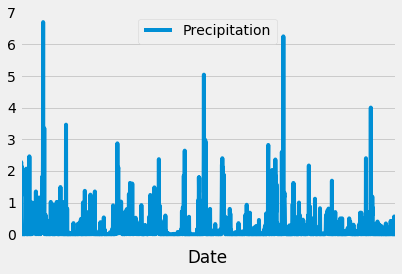

In [39]:
# Precipitation Analysis: From NoteBook: Use Pandas Plotting with Matplotlib to plot the data . 
# Precipitation Analysis: From Instructions: Plot the results using the DataFrame plot method.
# http://localhost:8889/notebooks/10-Advanced-Data-Storage-and-Retrieval/2/Activities/09-Par_EmojiPlotting/Solved/Stu_Plotting.ipynb

df_measurements_dt_prcp.plot()
plt.xticks([])
plt.grid(b=True, which='minor', axis='both')

In [40]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

df_measurements_dt_prcp.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [41]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
# Design a query to show how many stations are available in this dataset?

stations = session.query(Station).group_by(Station.station).count()
print(stations)
type(stations)

9


int

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# https://docs.sqlalchemy.org/en/13/orm/tutorial.html#querying-with-joins


# Using Textual SQL
# That’s why SQLAlchemy lets you just use strings, for those cases when the SQL is already known 
# https://docs.sqlalchemy.org/en/13/core/tutorial.html#sqlexpression-text
zzz = text(
" SELECT station.station as Station, count(measurement.station) as Observations"
" FROM measurement "
" JOIN station on station.station = measurement.station "
" GROUP BY station.name "
" ORDER BY Observations DESC ")
session.execute(zzz).fetchall()
# type(session) sqlalchemy.orm.session.Session

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [1]:
# https://docs.sqlalchemy.org/en/13/orm/tutorial.html#querying-with-joins
for station, measurement in session.query(Station, Measurement).\
                    filter(Station.id==Measurement.id).\
                     all():
     print(station.name)
     print(measurement)


NameError: name 'session' is not defined

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

s3 = text(
" SELECT station.station as Station, count(measurement.station) as Observations"
" FROM measurement "
" JOIN station on station.station = measurement.station "
" GROUP BY station.name "
" ORDER BY Observations DESC ")
session.execute(s3).fetchall()

[('WAIHEE 837.5, HI US', 2772),
 ('WAIKIKI 717.2, HI US', 2724),
 ('KANEOHE 838.1, HI US', 2709),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('MANOA LYON ARBO 785.2, HI US', 2612),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('PEARL CITY, HI US', 1372),
 ('UPPER WAHIAWA 874.3, HI US', 511)]

In [19]:
# Using Textual SQL
# That’s why SQLAlchemy lets you just use strings, for those cases when the SQL is already known 
# https://docs.sqlalchemy.org/en/13/core/tutorial.html#sqlexpression-text
sss = text(
 "SELECT tobs, count(tobs)"
"FROM measurement "
 "where station = 'USC00519281' and date >= date('2017-08-23','-365 days') "
"GROUP BY tobs")
session.execute(sss).fetchall()
# type(session) sqlalchemy.orm.session.Session

[(59.0, 3),
 (60.0, 2),
 (61.0, 1),
 (62.0, 6),
 (63.0, 4),
 (64.0, 3),
 (65.0, 7),
 (66.0, 5),
 (67.0, 15),
 (68.0, 12),
 (69.0, 19),
 (70.0, 22),
 (71.0, 18),
 (72.0, 22),
 (73.0, 18),
 (74.0, 39),
 (75.0, 33),
 (76.0, 33),
 (77.0, 31),
 (78.0, 22),
 (79.0, 18),
 (80.0, 11),
 (81.0, 4),
 (82.0, 3),
 (83.0, 1)]

In [25]:
df_measurements_tobs_frequent = pd.read_sql_query(sss, engine)
df_measurements_tobs_frequent.columns = ['Frequency','tobs']
df_measurements_tobs_frequent.set_index('tobs',drop=True, inplace=True)
df_measurements_tobs_frequent

,Frequency
tobs,
3,59.0
2,60.0
1,61.0
6,62.0
4,63.0
3,64.0
7,65.0
5,66.0
15,67.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028D9DF5AA58>]],
      dtype=object)

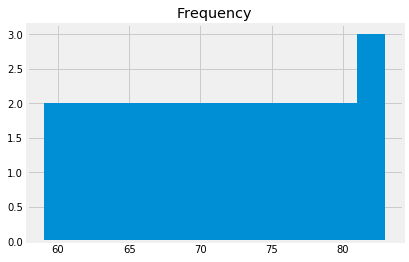

In [26]:

df_measurements_tobs_frequent.hist(bins=12)


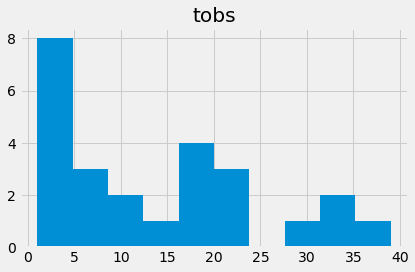

In [180]:
df_measurements_tobs_frequent.hist()
plt.tight_layout()

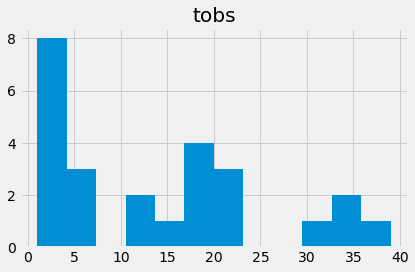

In [184]:
# An "interface" to matplotlib.axes.Axes.hist() method

df_measurements_tobs_frequent.hist(bins=12)

plt.tight_layout()


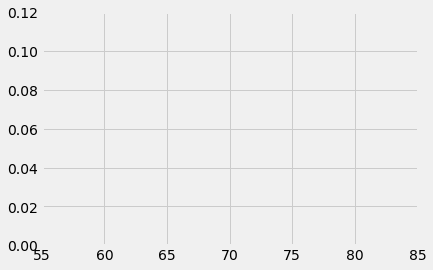